In [18]:
! pip install optbinning

In [19]:
from optbinning import BinningProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


print('Succesfull!')

Succesfull!


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# train_data = pd.read_excel('/content/drive/MyDrive/datasets/dataset_train_praktika_7.xlsx')
# train_data = pd.read_csv('/content/drive/MyDrive/datasets/dataset_train.txt', sep=',', engine='c')
train_data = pd.read_csv('/content/drive/MyDrive/datasets/dataset_praktika7.txt', sep=',', engine='c')
train_data

ClientID  Recency   Freq   Amount  AvarageAmountPerItem  \
0      client13166    650.0   14.0   2705.0            193.214286   
1       client1239      3.0  127.0  42161.0            331.976378   
2      client30041    158.0   85.0  16057.0            188.905882   
3      client36276    257.0   10.0   4614.0            461.400000   
4      client14136    185.0   28.0  35870.0           1281.071429   
...            ...      ...    ...      ...                   ...   
42741          NaN      NaN    NaN      NaN                   NaN   
42742          NaN      NaN    NaN      NaN                   NaN   
42743          NaN      NaN    NaN      NaN                   NaN   
42744          NaN      NaN    NaN      NaN                   NaN   
42745          NaN      NaN    NaN      NaN                   NaN   

       AvarageAmountPerGroup  Event  ItemGroupUnique  ItemUnique  \
0                 676.250000  False              4.0        14.0   
1                3243.153846  False             13.0       108.0   
2                1784.111111  False              9.0        67.0   
3                1153.500000  False              4.0        10.0   
4                5124.285714  False              7.0        27.0   
...                      ...    ...              ...         ...   
42741                    NaN   True              NaN         NaN   
42742                    NaN   True              NaN         NaN   
42743                    NaN   True              NaN         NaN   
42744                    NaN   True              NaN         NaN   
42745                    NaN   True              NaN         NaN   

       LastVisitAmount  VisitsOnWeekend  
0               1600.0              NaN  
1               1077.0             13.0  
2                158.0              4.0  
3                109.0              1.0  
4                329.0              2.0  
...                ...              ...  
42741              NaN              NaN  
42742              NaN              NaN  
42743              NaN              NaN  
42744              NaN              NaN  
42745              NaN              NaN  

[42746 rows x 11 columns]

In [22]:
selection_criteria = {
    "iv":
        {
            "min": 0.02,
            "max": 2.5,
            "strategy": "highest",
            "top": 10
        },
    "quality_score":
        {
            "min": 0.01
        }
}

print('Succesfull!')

Succesfull!


In [23]:
variable_names = list(train_data.iloc[:, ~train_data.columns.isin(['ClientID', 'Event'])])
X = train_data[variable_names]
Y = train_data['Event'].values

print('Succesfull!')

Succesfull!


Инициализация BinningProcess

In [24]:
binning_process = BinningProcess(variable_names=variable_names, selection_criteria=selection_criteria, max_n_bins=5)
binning_process.fit(X=X, y=Y)
binning_process.summary()

name      dtype   status  selected n_bins        iv  \
0                Recency  numerical  OPTIMAL      True      5  1.117391   
1                   Freq  numerical  OPTIMAL      True      5  0.636889   
2                 Amount  numerical  OPTIMAL      True      5  0.449928   
3   AvarageAmountPerItem  numerical  OPTIMAL      True      5  0.110749   
4  AvarageAmountPerGroup  numerical  OPTIMAL      True      5  0.155077   
5        ItemGroupUnique  numerical  OPTIMAL      True      5  0.586192   
6             ItemUnique  numerical  OPTIMAL      True      5  0.617854   
7        LastVisitAmount  numerical  OPTIMAL      True      5  0.081107   
8        VisitsOnWeekend  numerical  OPTIMAL      True      5   0.37975   

         js      gini quality_score  
0  0.122774  0.625371      0.080783  
1  0.075126  0.526929      0.662137  
2  0.053846  0.470249      0.907493  
3  0.013531  0.292052      0.390162  
4  0.018866  0.330444      0.550267  
5  0.069697  0.515151      0.740785  
6  0.072888  0.521141      0.690255  
7  0.010061  0.272876      0.287476  
8  0.044833  0.310259      0.877869

Расчет IV и WoE для "Посещений в выходные"

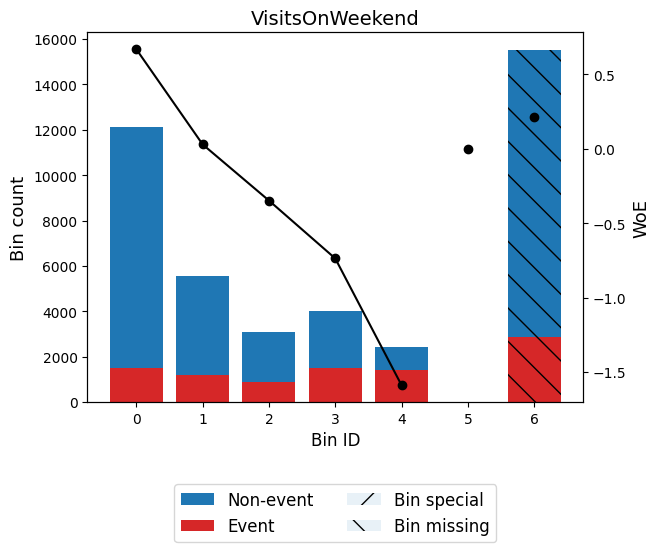

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.31025888
    IV (Jeffrey)             0.37975042
    JS (Jensen-Shannon)      0.04483297
    Hellinger                0.04608346
    Triangular               0.17065883
    KS                       0.15847550
    HHI                      0.24629457
    HHI (normalized)         0.12067699
    Cramer's V               0.32245437
    Quality score            0.87786898

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   228.064519 1.575602e-51 1.178912e-105       1.0
        1      2    53.797538 2.222511e-13  5.206344e-20       1.0
        2      3    57.289436 3.761703e-14  3.165792e-17       1.0
        3      4   268.458395 2.459795e-60 5.012272e-123       1.0



In [25]:
optb_weekend_visits = binning_process.get_binned_variable("VisitsOnWeekend")
optb_weekend_visits.binning_table.plot(metric="woe")
optb_weekend_visits.binning_table.analysis()

Расчет IV и WoE для "Товарное разнообразие"

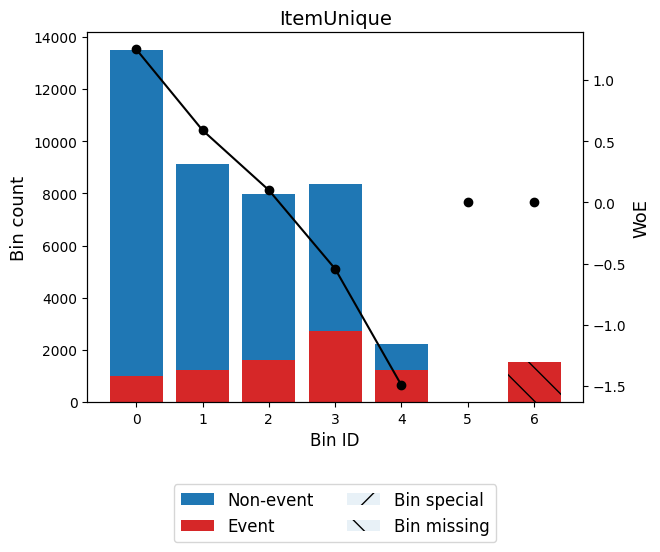

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.52114091
    IV (Jeffrey)             0.61785370
    JS (Jensen-Shannon)      0.07288792
    Hellinger                0.07497000
    Triangular               0.27674636
    KS                       0.39080498
    HHI                      0.22241731
    HHI (normalized)         0.09282020
    Cramer's V               0.32305177
    Quality score            0.69025537

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   221.556673 4.138460e-50  1.662946e-84       1.0
        1      2   140.705808 1.865832e-32  1.375921e-48       1.0
        2      3   316.217891 9.654760e-71 8.642755e-110       1.0
        3      4   397.753350 1.698265e-88 7.624165e-307       1.0



In [26]:
optb_product_diversity = binning_process.get_binned_variable("ItemUnique")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()

Расчет IV и WoE для "Разнообразие Товарных групп"

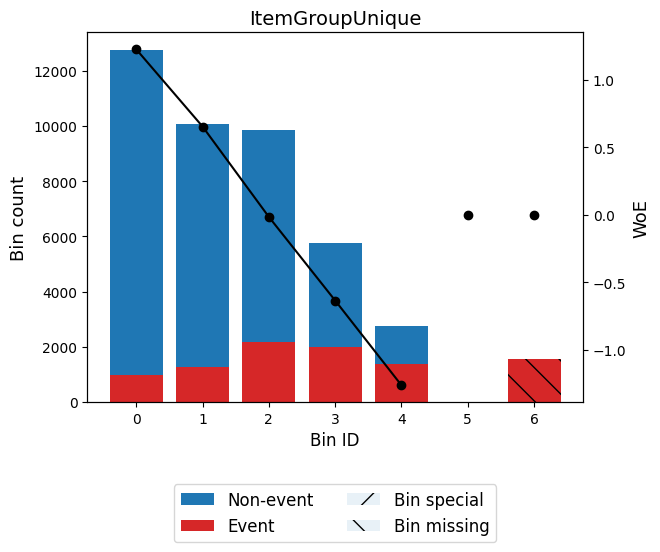

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.51515138
    IV (Jeffrey)             0.58619249
    JS (Jensen-Shannon)      0.06969678
    Hellinger                0.07142400
    Triangular               0.26626961
    KS                       0.37572390
    HHI                      0.22121632
    HHI (normalized)         0.09141904
    Cramer's V               0.31233725
    Quality score            0.74078517

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   165.523049 7.031567e-38  7.425730e-59       1.0
        1      2   308.479337 4.682668e-69 6.275082e-108       1.0
        2      3   287.354400 1.875070e-64 2.578254e-126       1.0
        3      4   180.406349 3.950922e-41  8.759173e-88       1.0



In [27]:
optb_product_groups = binning_process.get_binned_variable("ItemGroupUnique")
optb_product_groups.binning_table.plot(metric="woe")
optb_product_groups.binning_table.analysis()

Расчет IV и WoE для "Потраченной суммы за последний визит"

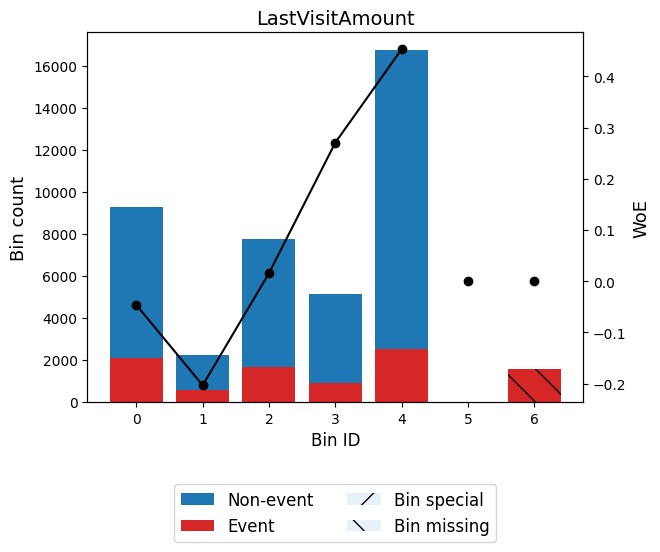

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.27287604
    IV (Jeffrey)             0.08110687
    JS (Jensen-Shannon)      0.01006061
    Hellinger                0.01009929
    Triangular               0.03993754
    KS                       0.16623767
    HHI                      0.25230594
    HHI (normalized)         0.12769027
    Cramer's V               0.09215951
    Quality score            0.28747595

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     8.326691 3.906676e-03  0.001413 9.985875e-01
        1      2    15.465517 8.402427e-05  0.999954 4.566176e-05
        2      3    30.944810 2.654711e-08  1.000000 4.350498e-11
        3      4    18.406250 1.784716e-05  0.999991 9.420675e-06



In [28]:
optb_last_visit_spent = binning_process.get_binned_variable("LastVisitAmount")
optb_last_visit_spent.binning_table.plot(metric="woe")
optb_last_visit_spent.binning_table.analysis()

Расчет IV и WoE для "Средняя стоимость товара"

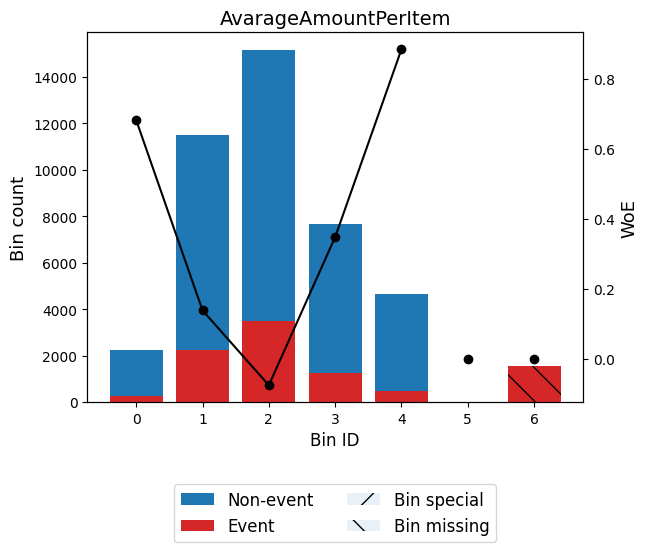

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.29205249
    IV (Jeffrey)             0.11074894
    JS (Jensen-Shannon)      0.01353138
    Hellinger                0.01368480
    Triangular               0.05295888
    KS                       0.16623767
    HHI                      0.24625040
    HHI (normalized)         0.12062546
    Cramer's V               0.10959932
    Quality score            0.39016249

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]     P[B > A]
        0      1    64.130647 1.164362e-15 1.328640e-17 1.000000e+00
        1      2    49.721527 1.771911e-12 6.664047e-15 1.000000e+00
        2      3   137.023844 1.191458e-31 1.000000e+00 1.110223e-16
        3      4    89.383233 3.252818e-21 1.000000e+00 1.110223e-16



In [29]:
optb_last_visit_spent = binning_process.get_binned_variable("AvarageAmountPerItem")
optb_last_visit_spent.binning_table.plot(metric="woe")
optb_last_visit_spent.binning_table.analysis()

Расчет IV и WoE для "Средняя стоимость группы товаров"

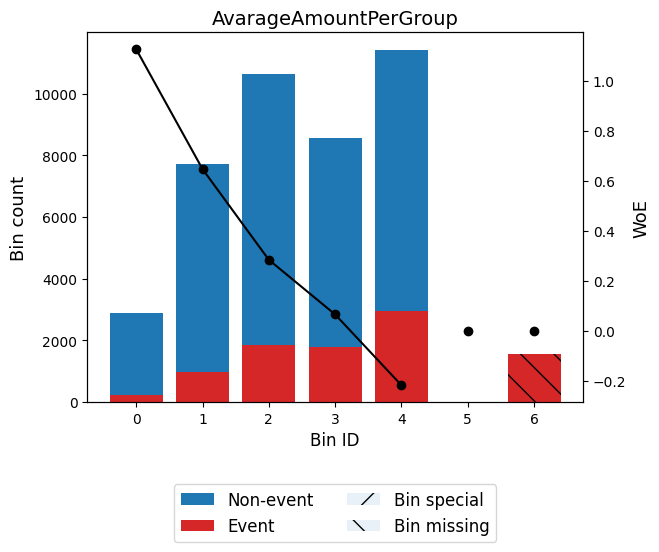

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.33044413
    IV (Jeffrey)             0.15507722
    JS (Jensen-Shannon)      0.01886630
    Hellinger                0.01911906
    Triangular               0.07358252
    KS                       0.22763825
    HHI                      0.21171090
    HHI (normalized)         0.08032938
    Cramer's V               0.13812650
    Quality score            0.55026734

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1    40.596360 1.871550e-10 7.909453e-12       1.0
        1      2    72.805930 1.430464e-17 1.108758e-21       1.0
        2      3    35.022046 3.259934e-09 1.642580e-11       1.0
        3      4    68.816602 1.080592e-16 1.308652e-20       1.0



In [30]:
optb_last_visit_spent = binning_process.get_binned_variable("AvarageAmountPerGroup")
optb_last_visit_spent.binning_table.plot(metric="woe")
optb_last_visit_spent.binning_table.analysis()

Преобразование данных с использованием WoE

In [31]:
X_transform = binning_process.transform(X, metric="woe", metric_missing="empirical")
print(X_transform.head())

    Recency      Freq    Amount  AvarageAmountPerItem  AvarageAmountPerGroup  \
0  2.335723  0.141619  0.641163              0.138018               0.647968   
1 -1.435839 -1.426958 -1.124697              0.138018              -0.216904   
2  1.088524 -1.426958 -0.387272              0.138018               0.066425   
3  1.088524  0.599653  0.641163             -0.075992               0.284994   
4  1.088524 -0.489716 -0.387272              0.347458              -0.216904   

   ItemGroupUnique  ItemUnique  LastVisitAmount  VisitsOnWeekend  
0         0.655058    0.100596         0.452789         0.210766  
1        -1.264299   -1.492929         0.270374        -1.588333  
2        -0.635536   -0.542402        -0.046543        -0.736448  
3         0.655058    0.590080        -0.046543         0.669004  
4        -0.015292   -0.542402        -0.203343         0.029858  


In [32]:
X_transform =binning_process.transform(X,metric="woe",metric_missing="empirical")
X_transform

Recency      Freq    Amount  AvarageAmountPerItem  \
0      2.335723  0.141619  0.641163              0.138018   
1     -1.435839 -1.426958 -1.124697              0.138018   
2      1.088524 -1.426958 -0.387272              0.138018   
3      1.088524  0.599653  0.641163             -0.075992   
4      1.088524 -0.489716 -0.387272              0.347458   
...         ...       ...       ...                   ...   
42741  0.000000  0.000000  0.000000              0.000000   
42742  0.000000  0.000000  0.000000              0.000000   
42743  0.000000  0.000000  0.000000              0.000000   
42744  0.000000  0.000000  0.000000              0.000000   
42745  0.000000  0.000000  0.000000              0.000000   

       AvarageAmountPerGroup  ItemGroupUnique  ItemUnique  LastVisitAmount  \
0                   0.647968         0.655058    0.100596         0.452789   
1                  -0.216904        -1.264299   -1.492929         0.270374   
2                   0.066425        -0.635536   -0.542402        -0.046543   
3                   0.284994         0.655058    0.590080        -0.046543   
4                  -0.216904        -0.015292   -0.542402        -0.203343   
...                      ...              ...         ...              ...   
42741               0.000000         0.000000    0.000000         0.000000   
42742               0.000000         0.000000    0.000000         0.000000   
42743               0.000000         0.000000    0.000000         0.000000   
42744               0.000000         0.000000    0.000000         0.000000   
42745               0.000000         0.000000    0.000000         0.000000   

       VisitsOnWeekend  
0             0.210766  
1            -1.588333  
2            -0.736448  
3             0.669004  
4             0.029858  
...                ...  
42741         0.210766  
42742         0.210766  
42743         0.210766  
42744         0.210766  
42745         0.210766  

[42746 rows x 9 columns]